# Example Proof-of-Concept 

## Imports, Functions, & Settings

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import glob
import os
import shutil
import gzip
from nilearn import image, masking, plotting, datasets
from nilearn.input_data import NiftiMasker
import networkx as nx

# For Sample Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs


In [ ]:
# Load fMRI and anatomical data
def load_fmri_data(fmri_filepath):
    fmri_img = nib.load(fmri_filepath)
    fmri_data = fmri_img.get_fdata()
    return fmri_data

def load_anatomical_data(anatomical_filepath):
    anatomical_img = nib.load(anatomical_filepath)
    anatomical_data = anatomical_img.get_fdata()
    return anatomical_data

## Data Extraction

In [ ]:
# gz_files = [f for f in glob(f"./data/**/*.gz", recursive=True) if os.path.isfile(f)]
# gz_files
# Extract each .gz file
# for gz_file in gz_files:
#     output_file = gz_file[:-3]  # Remove ".gz" extension

#     # Decompress the .gz file
#     with gzip.open(gz_file, 'rb') as f_in:
#         with open(output_file, 'wb') as f_out:
#             shutil.copyfileobj(f_in, f_out)

#     print(f"Extracted: {gz_file} -> {output_file}")


## Data Declaration

In [12]:

# Root directory is 'data'
root_dir = 'data'

# Glob all files that end in .nii under any 'func' directory (in nested subfolders)
func_files = glob.glob(os.path.join(root_dir, '**', 'func', '**', '*.nii'), recursive=True)

# Filter out files that contain the word 'mask' from the func_files list
func_files_without_mask = [file for file in func_files if 'mask' not in file]

# Glob all files that end in .nii under any 'anat' directory (in nested subfolders)
anat_files = glob.glob(os.path.join(root_dir, '**', 'anat', '**', '*.nii'), recursive=True)

# Glob all files that contain the word "mask" that end in .nii and are located under any 'func' directory (in nested subfolders)
func_mask_files = glob.glob(os.path.join(root_dir, '**', 'func', '**', '*mask*.nii'), recursive=True)

# Output the results
print("Func files without mask:", func_files_without_mask)
print("Anat files:", anat_files)
print("Func mask files:", func_mask_files)


Func files without mask: ['data/sub-0270/ses-01/func/sub-0270_ses-01_task-rest_bold.nii', 'data/sub-0205/ses-01/func/sub-0205_ses-01_task-rest_bold.nii', 'data/sub-0231/ses-01/func/sub-0231_ses-01_task-rest_bold.nii', 'data/sub-0240/ses-01/func/sub-0240_ses-01_task-rest_bold.nii', 'data/sub-0238/ses-01/func/sub-0238_ses-01_task-rest_bold.nii', 'data/sub-0252/ses-01/func/sub-0252_ses-01_task-rest_bold.nii', 'data/sub-2132/ses-01/func/sub-2132_ses-01_task-rest_bold.nii', 'data/sub-2122/ses-01/func/sub-2122_ses-01_task-rest_bold.nii', 'data/sub-0272/ses-01/func/sub-0272_ses-01_task-rest_bold.nii', 'data/sub-2130/ses-01/func/sub-2130_ses-01_task-rest_bold.nii', 'data/sub-2145/ses-01/func/sub-2145_ses-01_task-rest_bold.nii', 'data/sub-0264/ses-01/func/sub-0264_ses-01_task-rest_bold.nii', 'data/sub-2134/ses-01/func/sub-2134_ses-01_task-rest_bold.nii', 'data/sub-0202/ses-01/func/sub-0202_ses-01_task-rest_bold.nii', 'data/sub-2141/ses-01/func/sub-2141_ses-01_task-rest_bold.nii', 'data/sub-0203

## Data Visualization

### Anatomical Data Visualization

In [13]:
index = 0
file_list_len = len(func_files_without_mask)

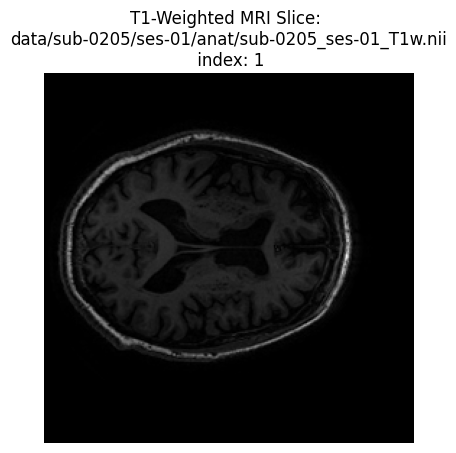

In [14]:
index += 1
index %= file_list_len
# Load the compressed NIfTI file
img = nib.load(anat_files[index])

# Get image data as a NumPy array
data = img.get_fdata()

# Display a middle slice of the brain
slice_index = data.shape[2] // 2  # Middle slice in the z-dimension

plt.imshow(data[:, :, slice_index], cmap="gray")
plt.axis("off")
plt.title(f"T1-Weighted MRI Slice: \n{anat_files[index]}\n index: {index}")
plt.show()


In [15]:
data.shape

(256, 256, 166)

In [16]:
anat_files[index]

'data/sub-0205/ses-01/anat/sub-0205_ses-01_T1w.nii'

In [17]:
img

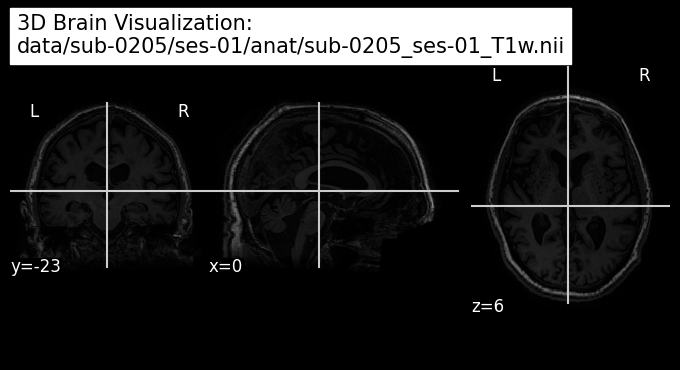

In [18]:
plotting.plot_anat(anat_files[index], title=f"3D Brain Visualization: \n{anat_files[index]}", threshold=0.5)

In [19]:
anat_data_f_name = anat_files[index]
func_data_f_name = func_files_without_mask[index]

# Load the compressed NIfTI file
img = nib.load(anat_data_f_name)

# Get image data as a NumPy array
anat_data = img.get_fdata()

# Load the compressed NIfTI file
img = nib.load(func_data_f_name)

# Get image data as a NumPy array
func_data = img.get_fdata()


### Sample Silhouette Score, Clustering, & Hyper-parameter Analysis

Silhouette Score: 0.4072728726656515
Best number of clusters: 7
Best silhouette score: 0.42847871115092523


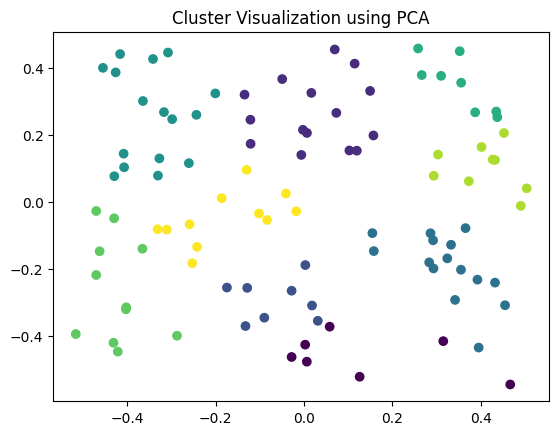

In [32]:
# Sample data
X = np.random.rand(100, 2)

# Fit K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Calculate silhouette score
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)

# Sample data
X = np.random.rand(100, 2)

best_k = 0
best_score = -1

# Try different numbers of clusters
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    if score > best_score:
        best_score = score
        best_k = k

print("Best number of clusters:", best_k)
print("Best silhouette score:", best_score)
labels = kmeans.labels_


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization using PCA')

plt.show()


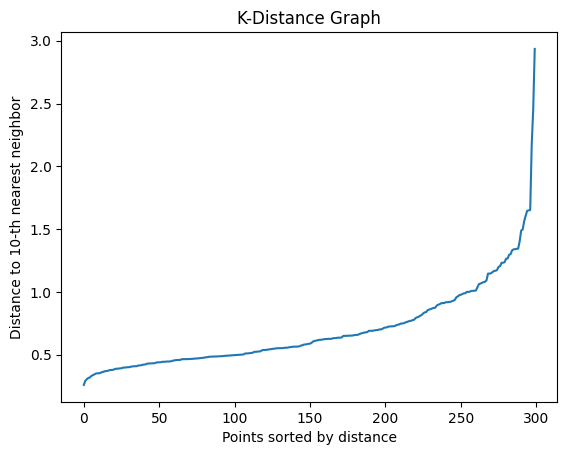

In [36]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Find distances to the k-th nearest neighbor (here k = min_samples)
min_samples = 10  # minimum number of points required to form a cluster
k = min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort the distances for plotting
distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}-th nearest neighbor')
plt.show()
# The elbow is a good point for setting eps

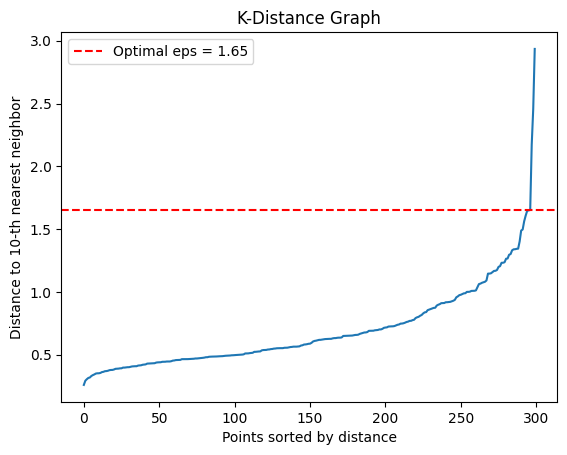

Optimal eps (elbow point): 1.65


In [ ]:


# Create sample data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Parameters for DBSCAN (min_samples used for k-nearest neighbors)
min_samples = 10
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort the distances for plotting (distance to the k-th nearest neighbor)
distances = np.sort(distances[:, min_samples-1], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')

# Find the optimal eps by identifying the elbow point
# The elbow can be detected by finding the point where the distance starts to increase rapidly
# We'll find the "elbow" by looking for the maximum change in slope
gradient = np.diff(distances)  # Calculate the differences between consecutive distances
second_derivative = np.diff(gradient)  # Second derivative approximates the curvature
optimal_eps_index = np.argmax(second_derivative) + 1  # Find the index where second derivative is maximal

# Optimal eps is the distance at this index
optimal_eps = distances[optimal_eps_index]

# Plot horizontal line at the optimal eps value
plt.axhline(y=optimal_eps, color='r', linestyle='--', label=f'Optimal eps = {optimal_eps:.2f}')

plt.legend()
plt.show()

# Output the optimal eps value
print(f'Optimal eps (elbow point): {optimal_eps:.2f}')


Silhouette Score: 0.8498708652925125
Number of clusters found (excluding noise): 3


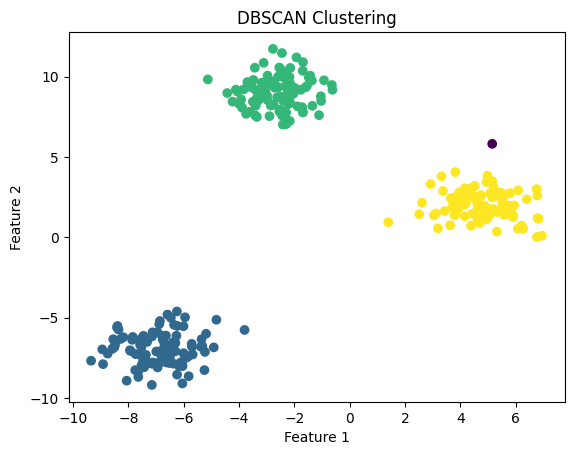

In [46]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create sample data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply DBSCAN
eps = 1.65  # maximum distance between points to be considered neighbors
# min_samples = 10  # minimum number of points required to form a cluster
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X)

# Calculate the silhouette score
# Exclude noise points (labeled as -1)
if len(set(labels)) > 1:  # Ensure that there is at least one cluster (excluding noise)
    mask = labels != -1
    score = silhouette_score(X[mask], labels[mask])  # Only use points that are not noise
    print(f'Silhouette Score: {score}')
else:
    print('Silhouette Score cannot be computed because all points are noise.')

# Count the number of clusters (excluding noise points labeled as -1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters found (excluding noise): {num_clusters}')

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### [Process](https://chatgpt.com/share/67dccc80-8f9c-8011-97b0-f044a525470d)

In [ ]:
# Intended Result:
# This method allows you to visualize the differences in brain activity between individuals using the networkx graph in a 3D space. By using Three.js, you can provide an interactive and detailed representation of the anatomical brain regions and their connections, colored by activity differences.